In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
#to reshape the Y_train from a 2d array to 1d
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane" , "automobile" , "bird" , "cat", "deer", "dog","frog" , "horse","ship","truck"]

In [7]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


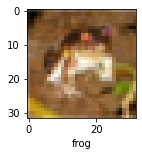

In [8]:
plot_sample(X_train , y_train , 0)

In [9]:
 #to normalize the rgb values from a range of 0 to 1
 X_train = X_train/255
 X_test = X_test/255

Artifical neural network accuracy ranges in the 40% 


In [10]:
#ann is artificial neural network
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000 , activation = 'relu'),
                         layers.Dense(1000 , activation='relu'),
                         layers.Dense(10,activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train , y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.8091 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6238 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5413 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4836 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4355 - accuracy: 0.4961


In [11]:
ann.evaluate(X_test , y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.4901 - accuracy: 0.4596


[1.4900975227355957, 0.4596000015735626]

In [12]:
#classification report 
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report : \n", classification_report(y_test , y_pred_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.55      0.53      0.54      1000
           1       0.69      0.42      0.52      1000
           2       0.52      0.08      0.14      1000
           3       0.31      0.29      0.30      1000
           4       0.37      0.54      0.44      1000
           5       0.31      0.53      0.39      1000
           6       0.57      0.48      0.52      1000
           7       0.74      0.36      0.48      1000
           8       0.54      0.69      0.60      1000
           9       0.43      0.68      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



Using CNN for imporoved accuracy over ANN


In [13]:
#cnn is convolutional neural network
cnn = models.Sequential([
                         #cnn
                         layers.Conv2D(filters=32 , kernel_size = (3,3) , activation='relu', input_shape=(32,32,3)), #convolutional layer
                         layers.MaxPooling2D((2,2)), #pooling layer

                         #second layer
                         layers.Conv2D(filters=64 , kernel_size = (3,3) , activation='relu'),
                         layers.MaxPooling2D((2,2)), #pooling layer


                         #dense 
                         layers.Flatten(),
                         layers.Dense(64 , activation='relu'),
                         layers.Dense(10,activation = 'softmax')
])

In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train , y_train , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4986 - accuracy: 0.4581
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1525 - accuracy: 0.5954
Epoch 3/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0243 - accuracy: 0.6426
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9391 - accuracy: 0.6725
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8810 - accuracy: 0.6938
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8279 - accuracy: 0.7137
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7834 - accuracy: 0.7287
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7473 - accuracy: 0.7397
Epoch 9/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7062 - accuracy: 0.7545
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [16]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9174 - accuracy: 0.7015


[0.9174095988273621, 0.7014999985694885]

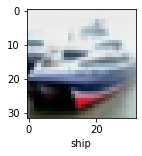

In [17]:
y_test = y_test.reshape(-1,)
plot_sample(X_test , y_test , 1)

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[7.3645113e-04, 9.1692078e-04, 1.9929212e-04, 8.8124520e-01,
        1.8918654e-04, 7.5927846e-02, 2.1976110e-02, 4.0329338e-04,
        1.4576464e-02, 3.8293328e-03],
       [2.5237520e-04, 2.3137175e-03, 3.2213436e-06, 1.6690363e-05,
        7.3179578e-08, 2.7502955e-07, 2.4165168e-09, 4.1825245e-07,
        9.9703264e-01, 3.8056364e-04],
       [9.6174337e-02, 2.2560959e-01, 2.1369592e-03, 2.3099402e-02,
        5.9604808e-03, 9.2452223e-04, 8.7336265e-04, 3.4453415e-03,
        5.2326131e-01, 1.1851466e-01],
       [2.2946469e-01, 5.9665608e-01, 1.5365800e-02, 1.4348718e-03,
        1.0730774e-01, 6.7134592e-05, 1.6772663e-04, 2.8417713e-03,
        4.5581754e-02, 1.1124329e-03],
       [3.0339537e-05, 1.8389526e-05, 1.3563997e-02, 3.8019612e-02,
        3.3971560e-01, 3.4852822e-03, 6.0509157e-01, 2.0596628e-05,
        4.2945609e-05, 1.1759423e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 1, 6]

In [20]:
print("Classification report : \n", classification_report(y_test , y_classes))

Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.82      0.81      0.81      1000
           2       0.81      0.38      0.51      1000
           3       0.54      0.51      0.52      1000
           4       0.58      0.71      0.64      1000
           5       0.55      0.68      0.61      1000
           6       0.78      0.79      0.79      1000
           7       0.72      0.76      0.74      1000
           8       0.84      0.79      0.81      1000
           9       0.74      0.85      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

